In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#mengimport libray yang dibutuhkan

Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()
#memuat dataframe day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()
#memuat dataframe hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.info()
#memeriksa jumlah dan tipe pada dataframe day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Bisa kita lihat pada data diatas pada kolom dteday berupa tipe data object seharusnya tipe data pada kolom tersebut adalah datetime

In [5]:
hour_df.info()
#memerika jumlah dan tipe pada dataframe hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Bisa kita lihat pada data diatas pada kolom dteday berupa tipe data object seharusnya tipe data pada kolom tersebut adalah datetime

In [6]:
day_df.isna().sum()
#mengecek missing value pada dataframe day

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe diatas normal tidak ada missing value

In [7]:
hour_df.isna().sum()
#mengecek missing value pada dataframe hour

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe diatas normal tidak ada missing value

In [8]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada dataframe day data numerik di atas tidak terdapat keanehan atau outlier berdasarkan analisis ilmu statistika.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada dataframe hour data numerik di atas tidak terdapat keanehan atau outlier berdasarkan analisis ilmu statistika

In [10]:
print("Jumlah Duplikat hari",day_df.duplicated().sum())
print("Jumlah Duplikat hari",hour_df.duplicated().sum())

Jumlah Duplikat hari 0
Jumlah Duplikat hari 0


Pada dataframe day dan hour tidak ditemukan data duplikat

Cleansing Data

In [11]:
datetime_column = ['dteday']
for column in datetime_column:
    day_df[column]= pd.to_datetime(day_df[column])
    hour_df[column]=pd.to_datetime(hour_df[column])
#Merubah tipe data pada kolom dteday dari object menjadi tipe data datetime

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Pada dataframe day diatas data tipe data dteday sudah berubah menjadi datetime dari sebelumnya object

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Pada dataframe hour diatas data tipe data dteday sudah berubah menjadi datetime dari sebelumnya object

Exploratory Data Analysis

In [14]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Bisa dilihat data diatas pada kolom cnt merupakan data total pengguna jasa rental sepeda perhari, maka kita akan membuat menjadi 3 segmen total pengguna jasa rental sepeda yaitu low, medium dan high.

In [15]:
q1, q2 = day_df['cnt'].quantile([0.33, 0.66])
def segment_count(x):
    if x <= q1:
        return 'low'
    elif x <= q2:
        return 'medium'
    else:
        return 'high'
day_df['demand_segment'] = day_df['cnt'].apply(segment_count)
print("Total per-segmen:\n", day_df['demand_segment'].value_counts())
#pengelompokan total pengguna jasa rental sepeda

Total per-segmen:
 demand_segment
high      249
low       241
medium    241
Name: count, dtype: int64


Data sudah dikelompokan menjadi 3 segmen yaitu low, medium dan high

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,demand_segment
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,low
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,low
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,low
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,low
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,low


Kolom demand_segment telah berhasil kita tambahkan pada dataframe day_df

In [17]:
day_hour_df = ( hour_df .groupby(['hr', 'weekday'])['cnt'] .mean() .unstack() .sort_index() ) 
day_hour_df.index = [f"{h:02d}:00" for h in day_hour_df.index] 
#Membuat dataframe baru dengan tabel 2D

Pada eksplorasi data selanjutkan saya akan mencoba untuk mencari tau jam berapa banyak pengguna jasa rental sepeda di waktu weekday dalam bentuk tabel 2D

In [18]:
day_hour_df.head()

weekday,0,1,2,3,4,5,6
00:00,93.990385,34.009524,27.623762,34.557692,39.271845,52.432692,94.304762
01:00,77.432692,17.307692,12.540000,15.336538,17.223301,24.721154,67.780952
02:00,61.627451,10.313131,6.801980,7.813725,9.156863,12.740385,50.495238
03:00,31.144231,5.113402,4.152174,4.888889,5.071429,6.598039,22.885714
04:00,9.362745,5.785714,5.131313,4.968750,5.280000,6.072165,7.657143


Dataframe baru telah terbentuk dengan tabel 2D

Data Visualization

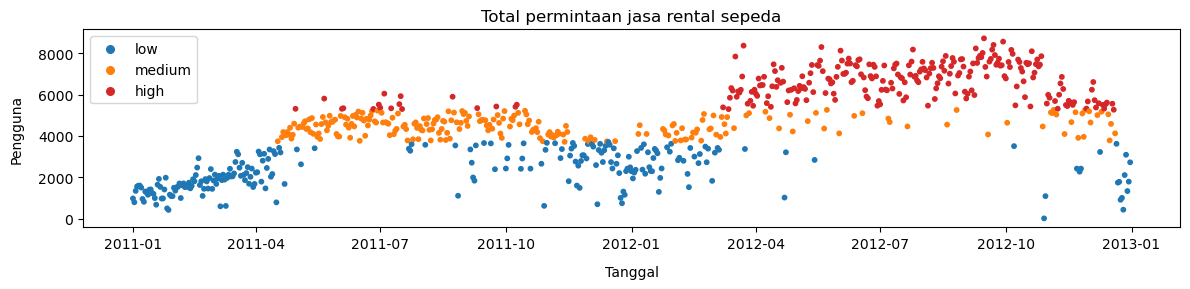

In [19]:
plt.figure(figsize=(12,3))
colors = {'low':'#1f77b4','medium':'#ff7f0e','high':'#d62728'}
plt.scatter(day_df['dteday'], day_df['cnt'], c=day_df['demand_segment'].map(colors), s=10)

for seg, color in colors.items():
    plt.scatter([], [], c=color, label=seg, s=30)

plt.title('Total permintaan jasa rental sepeda')
plt.ylabel('Pengguna', labelpad=10)
plt.xlabel('Tanggal',labelpad=10)
plt.legend(loc='upper left')
plt.tight_layout()
#membuat diagram scatter untuk total pengguna

Diagram scatter ini menunjukkan total pengguna per hari dari tahun 2011–2013, dikelompokkan ke dalam segmen low, medium, dan high berdasarkan jenis semua pengguna casual maupun registered

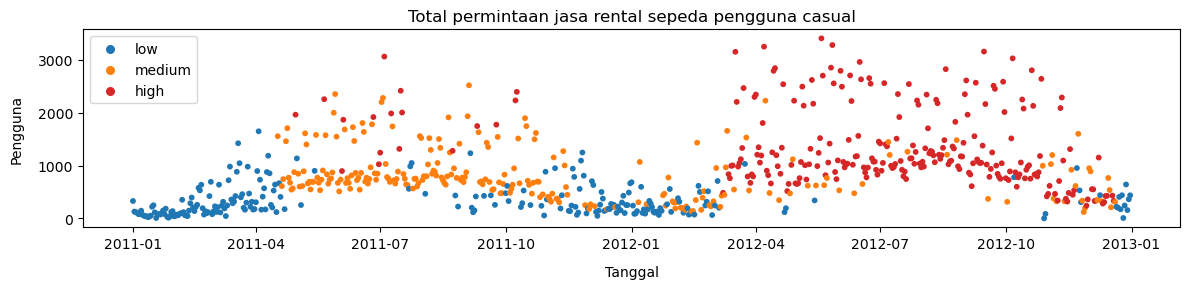

In [20]:
plt.figure(figsize=(12,3))
colors = {'low':'#1f77b4','medium':'#ff7f0e','high':'#d62728'}
plt.scatter(day_df['dteday'], day_df['casual'], c=day_df['demand_segment'].map(colors), s=10)

for seg, color in colors.items():
    plt.scatter([], [], c=color, label=seg, s=30)

plt.title('Total permintaan jasa rental sepeda pengguna casual')
plt.ylabel('Pengguna', labelpad=10)
plt.xlabel('Tanggal',labelpad=10)
plt.legend(loc='upper left')
plt.tight_layout()
#membuat diagram scatter total pengguna casual

Diagram scatter ini menunjukkan total pengguna per hari pada periode tahun januari 2011 sampai desember 2012, dikelompokkan ke dalam segmen low, medium, dan high, serta berdasarkan jenis pengguna casual

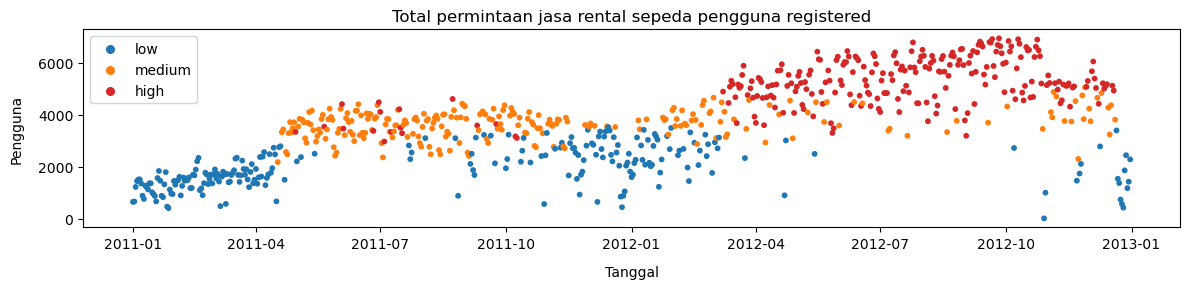

In [21]:
plt.figure(figsize=(12,3))
colors = {'low':'#1f77b4','medium':'#ff7f0e','high':'#d62728'}
plt.scatter(day_df['dteday'], day_df['registered'], c=day_df['demand_segment'].map(colors), s=10)

for seg, color in colors.items():
    plt.scatter([], [], c=color, label=seg, s=30)

plt.title('Total permintaan jasa rental sepeda pengguna registered')
plt.ylabel('Pengguna', labelpad=10)
plt.xlabel('Tanggal',labelpad=10)
plt.legend(loc='upper left')
plt.tight_layout()
#membuat diagram scatter total pengguna registered

Diagram scatter ini menunjukkan total pengguna per hari pada periode tahun januari 2011 sampai desember 2012, dikelompokkan ke dalam segmen low, medium, dan high, serta berdasarkan jenis pengguna registered

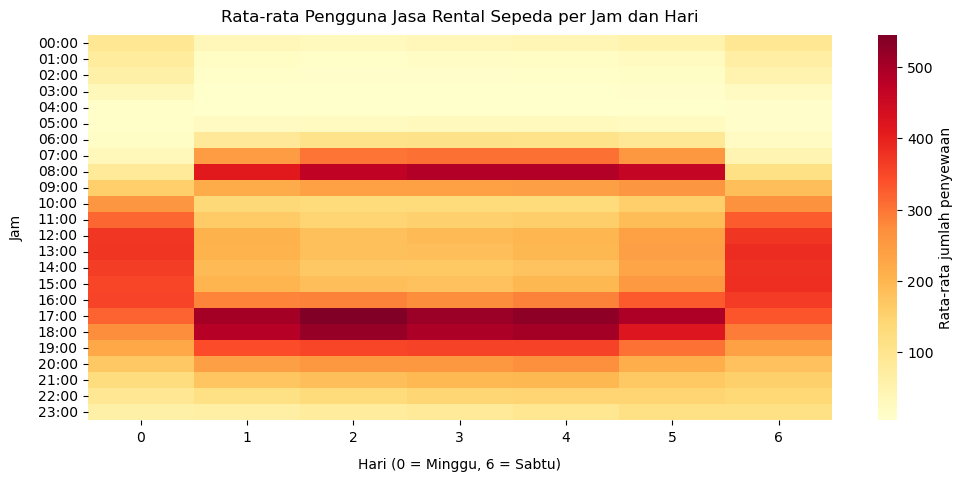

In [22]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    day_hour_df, 
    cmap='YlOrRd', 
    annot=False, 
    cbar_kws={'label': 'Rata-rata jumlah penyewaan','pad':0.05}
)
plt.title('Rata-rata Pengguna Jasa Rental Sepeda per Jam dan Hari',pad=10)
plt.ylabel('Jam',labelpad=10)
plt.xlabel('Hari (0 = Minggu, 6 = Sabtu)',labelpad=10)
plt.yticks(rotation=0)
plt.show()

Diagram heatmap di atas menunjukkan rata-rata permintaan jasa rental sepeda berdasarkan jam tertentu untuk setiap harinya periode tahun januari 2011 sampai desember 2012. Warna yang lebih gelap menandakan tingkat penyewaan yang lebih tinggi.

In [23]:
hour_df.to_csv("hour_df.csv", index=False)
day_df.to_csv("day_df.csv", index=False)
day_hour_df.to_csv("day_hour_df.csv", index=False)
#menyimpan berkas data